### HN-score vs stability

- イネのリファレンスプロテオームである[UP000059680](https://www.uniprot.org/proteomes/UP000059680)の構造を取得し､HN-scoreとjoin

In [1]:
import requests
import json
import time
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from cache import load_cache, save_cache

In [2]:
rice_all_uniprot_id = pl.read_csv(
    "../Data/Data_uniprot/id_mapping_result/20240623_foldx/idmapping_rice_all_HNscore_list_20240623_perfect.tsv",
    separator="\t"
).select(
    "From",
    "Entry"
).sort(
    "From",
    descending=False
)

display(rice_all_uniprot_id)

From,Entry
str,str
"""Os01g0100100""","""A0A0P0UX28"""
"""Os01g0100200""","""A0A0P0UWW9"""
"""Os01g0100200""","""B9EYQ4"""
"""Os01g0100300""","""A0A0P0UWT2"""
"""Os01g0100400""","""A0A0P0UXJ1"""
…,…
"""gene-rps7-3""","""A0A411LC49"""
"""gene-rps8""","""P0C494"""
"""gene-rps8""","""E9KIR6"""


In [3]:
HNscore_list = pl.read_csv(
    "../Data/Data_HN5_genelist_rice_2402/HN-score_rice_HN5_all.csv",
    separator=","
).rename(
    {
        "GENEID": "From"
    }
)

display(HNscore_list)

From,HN5
str,i64
"""Os04g0107900""",255
"""Os01g0136100""",245
"""Os02g0259900""",238
"""Os02g0259850""",237
"""Os03g0245800""",237
…,…
"""Os01g0952800""",-173
"""Os07g0142100""",-176
"""Os03g0307200""",-180


In [4]:
rice_all_uniprot_id_score = rice_all_uniprot_id.join(
    HNscore_list,
    on="From",
    how="left",
    coalesce=True
)

display(rice_all_uniprot_id_score)

From,Entry,HN5
str,str,i64
"""Os01g0100100""","""A0A0P0UX28""",-6
"""Os01g0100200""","""A0A0P0UWW9""",-4
"""Os01g0100200""","""B9EYQ4""",-4
"""Os01g0100300""","""A0A0P0UWT2""",6
"""Os01g0100400""","""A0A0P0UXJ1""",6
…,…,…
"""gene-rps7-3""","""A0A411LC49""",19
"""gene-rps8""","""P0C494""",-8
"""gene-rps8""","""E9KIR6""",-8


## FoldX result

In [5]:
foldx_result = pl.read_csv(
    "../Data/Data_alphafold/foldx_stability_all_result.tsv",
    separator='\t'
)
display(foldx_result)

Entry,Total Energy,Backbone Hbond,Sidechain Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,Van der Waals clashes,Entropy Side Chain,Entropy Main Chain,Sloop Entropy,Mloop Entropy,Cis Bond,Torsional Clash,Backbone Clash,Helix Dipole,Water Bridge,Disulfide,Electrostatic Kon,Partial Covalent Bonds,Energy Ionisation,Entropy Complex,Residue Number
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64
"""A0A0P0UZJ7""",145.864,-21.7993,-6.41064,-49.5699,-0.92377,91.4114,-58.6057,9.83033,25.0576,153.589,0,0,1.12406,2.18323,35.8252,-0.282849,0,0.0,0,0,0.260539,0,114
"""A0A0P0VD53""",129.345,-7.78763,-1.70165,-17.2485,-0.75628,43.3561,-16.6619,1.69149,5.95839,119.286,0,0,0.0,2.9615,28.2277,-0.020465,0,0.0,0,0,0.267812,0,92
"""Q0D8I9""",1407.39,-623.147,-150.713,-818.466,-26.9163,1200.65,-1060.58,104.88,438.607,2154.21,0,0,17.54,176.37,738.89,-4.71504,0,-4.26175,0,0,3.9336,0,1281
"""Q7XBU9""",579.689,-49.9904,-7.88261,-54.2849,4.7017,121.332,-55.9899,28.4189,26.4135,521.969,0,0,1.78591,42.3522,70.4487,-0.347496,0,0.0,0,0,1.21076,0,350
"""Q0J8G8""",132.247,-167.955,-15.7762,-138.431,-3.31217,222.091,-162.837,6.03602,62.1699,328.665,0,0,0.0,2.28636,154.474,-1.03709,0,0.0,0,0,0.347386,0,222
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""B7F2T8""",92.3902,-518.319,-95.8107,-681.235,-23.2505,941.072,-905.776,40.1756,343.423,983.386,0,0,2.33389,9.91963,579.688,-5.11739,0,0.0,0,0,1.58921,0,677
"""P38385""",32.6925,-60.6986,-1.68962,-42.3335,-0.319482,76.6017,-45.0855,1.91773,11.7307,92.9594,0,0,0.0,0.296541,58.2339,-0.773738,0,0.0,0,0,0.0868465,0,69
"""Q2QUZ5""",164.839,-20.075,-2.86447,-25.1462,-1.1395,50.7937,-28.1919,6.09183,11.4171,169.708,0,0,0.0,4.22751,31.3268,0.018337,0,0.0,0,0,0.0,0,115


In [6]:
df_join = rice_all_uniprot_id_score.join(
    foldx_result,
    on="Entry",
    how="left",
    coalesce=True
).filter(
    pl.col("Total Energy").is_not_null()
)

display(df_join)

From,Entry,HN5,Total Energy,Backbone Hbond,Sidechain Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,Van der Waals clashes,Entropy Side Chain,Entropy Main Chain,Sloop Entropy,Mloop Entropy,Cis Bond,Torsional Clash,Backbone Clash,Helix Dipole,Water Bridge,Disulfide,Electrostatic Kon,Partial Covalent Bonds,Energy Ionisation,Entropy Complex,Residue Number
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64
"""Os01g0100100""","""A0A0P0UX28""",-6,826.298,-287.797,-72.9807,-444.737,-23.6701,625.79,-588.988,78.2343,243.502,1214.26,0,0,6.12326,77.2011,358.755,-2.56098,0,0.0,0,0,1.92253,0,702
"""Os01g0100300""","""A0A0P0UWT2""",6,288.615,-118.507,-14.6384,-114.693,-4.75902,196.805,-138.28,16.0161,56.1695,401.393,0,0,0.378861,8.79483,140.481,-1.44845,0,0.0,0,0,1.38446,0,269
"""Os01g0100400""","""Q655L8""",6,70.9944,-383.34,-141.797,-647.783,-32.427,885.231,-845.458,48.226,310.443,876.492,0,0,1.12406,4.23901,215.031,-0.462657,0,-6.04824,0,0,2.55575,0,593
"""Os01g0100466""","""A0A0P0UXH5""",-4,110.474,-4.22604,-1.64262,-13.1219,0.0376322,31.7255,-11.7798,3.19759,3.82764,99.5956,0,0,0.0,2.61094,15.7046,-0.010644,0,0.0,0,0,0.260539,0,77
"""Os01g0100500""","""Q93VG6""",5,322.048,-350.125,-58.2134,-403.278,-8.89932,599.156,-501.466,43.6021,191.354,797.625,0,0,1.39929,20.8974,238.908,-0.52535,0,-10.8761,0,0,1.39754,0,524
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""gene-rps15-2""","""P0C470""",-14,25.2331,-72.5768,-14.2119,-73.2065,-0.091625,105.853,-93.3966,5.04615,39.6858,127.323,0,0,0.0,1.42346,78.637,-0.788095,0,0.0,0,0,0.173693,0,90
"""gene-rps2""","""P0C482""",-6,19.8894,-192.347,-40.9151,-263.769,-2.77302,365.415,-351.151,18.2357,132.494,350.949,0,0,0.0,2.86807,181.482,-0.19717,0,0.0,0,0,1.07995,0,236
"""gene-rps3""","""P0C485""",13,102.56,-152.203,-26.7921,-208.009,-8.45454,294.481,-277.85,15.6575,108.31,352.163,0,0,0.0,4.46858,115.785,-0.174788,0,0.0,0,0,0.963536,0,239


<Figure size 4000x4000 with 0 Axes>

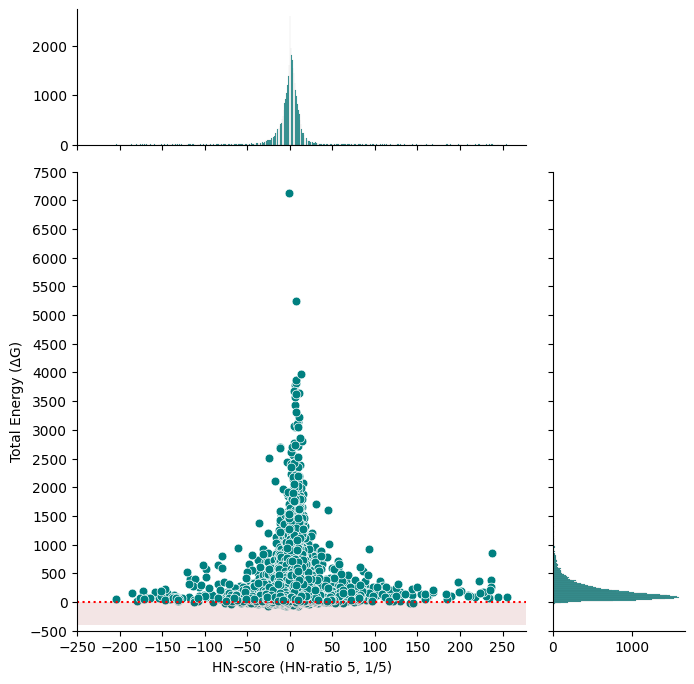

In [7]:
plt.figure(figsize=(8, 8), dpi=500)

g = sns.jointplot(
    data=df_join,
    x="HN5",
    y="Total Energy",
    s=40,
    color="teal",
    height=7, 
    ratio=3,
    marginal_ticks=True,
)

plt.ylim(-400,7500)
plt.xlabel("HN-score (HN-ratio 5, 1/5)")
plt.ylabel("Total Energy (ΔG)")
plt.axhline(y=0, color="red", linestyle=":")
plt.axhspan(ymin=plt.gca().get_ylim()[0], ymax=0, facecolor='darkred', alpha=0.1)
plt.xticks(range(-250, 300, 50))
plt.yticks(range(-500, 8000, 500))
plt.show()

In [8]:
df_join_filter = df_join.filter(
    (pl.col("Total Energy") <= 0) & (pl.col("HN5") > 41)
).sort(
    ["HN5","Total Energy"],
    descending=[True,False]
)

df_join_filter.write_csv(
    "../Data/Data_alphafold/foldx_stability_all_result_filter.tsv",
    separator='\t'
)
display(df_join_filter)

From,Entry,HN5,Total Energy,Backbone Hbond,Sidechain Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,Van der Waals clashes,Entropy Side Chain,Entropy Main Chain,Sloop Entropy,Mloop Entropy,Cis Bond,Torsional Clash,Backbone Clash,Helix Dipole,Water Bridge,Disulfide,Electrostatic Kon,Partial Covalent Bonds,Energy Ionisation,Entropy Complex,Residue Number
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64
"""Os06g0668200""","""Q655T1""",145,-11.8389,-307.151,-82.8395,-456.221,-13.6467,623.053,-622.717,28.7121,216.769,598.451,0,0,2.24811,3.67361,253.414,-3.18517,0,0.0,0,0,1.01525,0,401
"""Os03g0745600""","""B7F9F6""",141,-20.0405,-224.021,-27.7237,-252.126,-2.89134,345.736,-330.138,12.4151,107.076,348.377,0,0,1.12406,2.2835,232.868,-0.325106,0,0.0,0,0,0.173693,0,249
"""Os03g0285700""","""Q10N21""",63,-5.14444,-181.213,-63.4472,-280.402,-21.9363,398.151,-367.208,12.7627,143.084,353.681,0,0,0.0,1.66295,188.734,-1.63631,0,0.0,0,0,1.35706,0,250
"""Os08g0557800""","""Q6ZJ06""",62,-8.82874,-410.004,-114.513,-584.362,-34.3212,795.365,-778.416,43.9187,301.892,769.045,0,0,1.12406,4.62771,367.074,-5.81017,0,0.0,0,0,2.626,0,509
"""Os03g0785900""","""Q10CE7""",59,-4.81769,-173.665,-54.5301,-257.021,-15.243,353.552,-341.253,16.3901,133.521,332.36,0,0,1.12406,1.83414,178.144,-2.42588,0,0.0,0,0,0.538301,0,231
"""Os10g0537500""","""Q8LNN5""",53,-16.4653,-289.518,-28.1329,-314.585,-8.59085,433.659,-404.944,12.8635,140.829,436.773,0,0,1.12406,3.29267,290.086,-0.130629,0,0.0,0,0,0.894834,0,294
"""Os05g0595100""","""Q8LNZ3""",45,-3.54758,-261.834,-97.726,-403.372,-19.5894,551.565,-537.139,29.945,207.11,520.91,0,0,1.12406,4.95029,216.016,-1.42872,0,0.0,0,0,1.93805,0,354
"""Os09g0315700""","""A0A0P0XLG1""",43,-4.17404,-810.974,-237.141,-1161.18,-78.6619,1629.64,-1520.3,60.5276,642.042,1462.09,0,0,0.267024,13.3674,820.25,-8.58164,0,0.0,0,0,4.73224,0,975
